## **homevideosalepredictor - Giancarlo Garbagnati**  
### Scraping Notebook

### Methodology ###

  * Scrape one movie's info from BoxOfficeMojo
  * Scrape a list of movies from 2001-2015 from BoxOfficeMojo
  * Scrape all movies from list
  * Use list to find movies on other websites (the numbers, rotten tomatoes) and scrape from those


In [ ]:
# imports
from __future__ import print_function, division
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime

import re # regular expressions
import requests

%matplotlib inline

#### Scraping for individual variables

The following cells should be getting response codes for each website, and then souping each up.

In [ ]:
### BOM
url = 'http://www.boxofficemojo.com/movies/?id=biglebowski.htm&adjust_yr=2015&p=.htm'

response_bom = requests.get(url)
response_code_bom = response_bom.status_code
if response_bom.status_code > 399:
    print('Error with BOM access:', response_bom.status_code)
print(response_code_bom)

### THE-NUMBERS
url_tn = 'http://www.the-numbers.com/movie/Revenant-The-(2015)#tab=summary'

response_tn = requests.get(url_tn)
response_code_tn = response_tn.status_code
if response_tn.status_code > 399:
    print('Error with T-N access:', response_tn.status_code)
print(response_code_tn)

### THE-NUMBERS - VIDEO SALES
url_tn_f = url_tn[:-7] + 'video-sales'
#print(url_tn_f)

response_tn_f = requests.get(url_tn_f)
response_code_tn_f = response_tn_f.status_code
if response_tn_f.status_code > 399:
    print('Error with T-N-F access:', response_tn_f.status_code)
print(response_code_tn_f)

### ROTTEN TOMATOES
url_rt = 'https://www.rottentomatoes.com/m/star_wars_episode_vii_the_force_awakens/'

response_rt = requests.get(url_rt)
response_code_rt = response_rt.status_code
if response_rt.status_code > 399:
    print('Error with RT access:', response_rt.status_code)
print(response_code_rt)

In [ ]:
### BOM
page = response_bom.text
soup_bom = BeautifulSoup(page)

# Mini Soup for scraping Opening Weekend $ and Widest Release from BOM
soup_bom_2 = BeautifulSoup(str(soup_bom.find_all(class_ = 'mp_box_content')[1]))

### THE-NUMBERS
page = response_tn.text
soup_tn = BeautifulSoup(page)

# Mini Soup for scraping Release Date/Budget/Runtime from T-N
soup_tn_2 = BeautifulSoup(soup_tn.find(text=re.compile('Movie Details')).parent.findNextSibling().text)
#print(soup)

### THE-NUMBERS - VIDEO-SALES
page = response_tn_f.text
soup_tn_f = BeautifulSoup(page)

### THE-NUMBERS - VIDEO-SALES SUBSECTION
soup_tn_f_2 = soup_tn_f.find(id='video-sales')

### ROTTEN TOMATOES
page = response_rt.text
soup_rt = BeautifulSoup(page)

These next cells will how I isolated a specific piece of information from box office mojo soup.

In [ ]:
# Source: BOM
# Title
# title_bom

title_bom = soup_bom.find('table',{'border':'0'}).find_all('td', {'valign':'top'})[2].contents[1].text

title_bom

In [ ]:
# Source: BOM
# Release Date
# reldate
from datetime import datetime

# One way to find it
#reldate = soup_bom.find('table',{'border':'0'}).find_all('td', {'valign':'top'})[4].contents[1].text

reldate = soup_bom.find(text=re.compile('Release Date')).findNextSibling().text

reldate = datetime.strptime(reldate, '%B %d, %Y')

reldate

In [ ]:
# Source: BOM
# Domestic Total Gross 2016 adjusted
# dtg2016a

dtg2016a = soup_bom.find(text=re.compile('Domestic Total Adj')).findNextSibling().text

dtg2016a = float(re.sub('[$,]','',dtg2016a))

dtg2016a

In [ ]:
# Source: BOM
# Genres
# genres

genres = soup_bom.find(text=re.compile('Genre:')).findNextSibling().text

genres

In [ ]:
# Source: BOM
# Runtime (in minutes) (from BOM)
# runtime

runtime_bom = soup_bom.find(text=re.compile('Runtime')).findNextSibling().text

runtime_bom = datetime.strptime(runtime_bom, '%H hrs. %M min.')

hours = runtime_bom.time().hour
minutes = runtime_bom.time().minute

runtime_bom = minutes + (60*hours)

runtime_bom

In [ ]:
# Source: BOM
# MPAA Rating
# mpaarating

mpaarating = soup_bom.find(text=re.compile('MPAA Rating')).findNextSibling().text

mpaarating


In [ ]:
# Source: BOM
# Opening Weekend
# opwknd

opwknd = soup_bom_2.find('a', href=re.compile('/weekend/chart/')).parent.findNextSibling().text

opwknd = float(re.sub('[,]','',opwknd[2:]))

opwknd

In [ ]:
# Source: BOM
# Number of theaters involved in Widest Release
# widestrel

widestrel = soup_bom_2.find(text=re.compile('Widest')).parent.findNextSibling().text
widestrel = int(re.sub('[theatres, ]','',widestrel[1:]))
widestrel

widestrel

In [ ]:
# Source: BOM
# Director Name(s)
# directors

# What we want
#directors_obj = soup.find_all(class_='mp_box_content')[2].contents[1].contents[1].contents[1]

# Parent of
directors_obj = soup_bom.find_all(class_='mp_box_content')[2].contents[1].contents[1]

directors = []
for child in directors_obj:
    directors.append(child.text)

# Gets rid of the first object which should always just be "Directors: "  
directors.pop(0)

directors

In [ ]:
# Source: BOM
# Genres (more specific genres)
# genres2
## not used in final modeling

# Starting where we want
#genres2 = soup.find_all(class_='mp_box_content')[3].contents[1].contents[3]

# Parent of
#genres2_obj = soup_bom.find_all(class_='mp_box_content')[3].contents[1]
# Doesn't work
#genres2_obj = soup_bom.find_all(class_='mp_box_content').find('Rank')

if 'Genre' in soup_bom.find_all(class_='mp_box_content')[3].text:
    genres2_obj = soup_bom.find_all(class_='mp_box_content')[3].contents[1]
else:
    genres2_obj = soup_bom.find_all(class_='mp_box_content')[4].contents[1]
#genres2_obj = soup_bom.find_all(class_='mp_box_content')[4].contents[1]

#.find(class_='mp_box_content')


genres2_obj
#genres2_obj.contents[3].text

genres2 = []
i = 0
for child in genres2_obj:
    #print(i, child)
    if i % 2 == 1 and i > 2:
        g = child.text.strip()
        newline_i = g.find('\n')
        genres2.append(g[:newline_i])
    i += 1

#'genre' in 'Genre\nRank'

genres2

These next cells will how I isolated a specific piece of information from the-numbers (main page) soup.

In [ ]:
# Source: T-N
# Movie Title
# title_tn

#reldate_tn = soup_tn.find('table',{'border':'0'}).find_all('td', {'valign':'top'})[8].contents[1].text
title_tn = soup_tn.find('h1',{'itemprop':'name'}).text

#url_tn

title_tn

In [ ]:
# Source: T-N
# Release Date
# reldate_tn

#Worked for Big Leb
#reldate_tn = soup_tn.find_all('h2')[1].findNextSibling().contents[3].text

start_i = soup_tn_2.text.find('Domestic Releases:')
end_i = soup_tn_2.text.find('(Wide) by')
offset_i = len('Domestic Releases:') + 1

reldate_s = soup_tn_2.text[start_i+offset_i:end_i]
#print(reldate_s)

# Strip everything before the date
#reldate_tn = reldate_s[reldate_s.find('\n')+1:]

# Strip everything after the date
#reldate_tn = reldate_tn[:reldate_tn.find('(Wide)')-1]

# Change to datetime
# But first let's get rid of the "st, nd, rd, th"s
reldate_s = reldate_s.strip()
year = reldate_s[-5:]
#print(year)
remainder = reldate_s[:-8]
#print(remainder)
reldate_s = remainder + year

reldate_tn = datetime.strptime(reldate_s, '%B %d %Y')

reldate_tn

In [ ]:
# Source: T-N
# Movie Runtime (in min) (from T-N)
# runtime_tn

start_i = soup_tn_2.text.find('Running Time:\n')
end_i = soup_tn_2.text.find(' minutes')
offset_i = len('Running Time:\n')

# print(start_i)
# print(end_i)
# print(offset_i)
runtime_tn = int(soup_tn_2.text[start_i+offset_i:end_i])

runtime_tn

In [ ]:
# Source: T-N
# Production Budget (from T-N)
# prodbud

start_i = soup_tn_2.text.find('Budget:$')
end_i = soup_tn_2.text.find('\nDomestic')
offset_i = len('Budget:$')

prodbud = soup_tn_2.text[start_i+offset_i:end_i]

prodbud = float(re.sub('[,$]','',prodbud))

prodbud

In [ ]:
# Source: T-N
# Video Release Date
# vidrel

start_i = soup_tn_2.text.find('Video\xa0Release:\n')
offset_i = len('Video\xa0Release:\n')

vidrel = soup_tn_2.text[start_i+offset_i:]

#print(vidrel)

end_i = vidrel.find(' by ')

vidrel = vidrel[:end_i]

#print(vidrel)

# Change to datetime
# But first let's get rid of the "st, nd, rd, th"s
vidrel = vidrel.strip()
year = vidrel[-5:]
#print(year)
remainder = vidrel[:-8]
#print(remainder)
vidrel = remainder + year

vidrel = datetime.strptime(vidrel, '%B %d %Y')

vidrel

These next cells will how I isolated a specific piece of information from rotten tomatoes soup.

In [ ]:
# Source: RT
# Movie Title
# title_rt

end_i = soup_rt.find('title').text.find(' - Rotten Tomatoes') - 7

title_rt = soup_rt.find('title').text[:end_i]

title_rt

In [ ]:
# Source: RT
# Rotten Tomato Critic Rating (out of 1.0)
# rt_critic

rt_critic = str(soup_rt.find(class_='col-sm-12 tomato-info hidden-xs').contents[1].contents[1])

start_i = rt_critic.find('width:')
end_i = rt_critic.find('%;"></div>')
offset_i = len('width:')

rt_critic = float(rt_critic[start_i+offset_i:end_i])/100

rt_critic

In [ ]:
# Source: RT
# Rotten Tomato User Rating (out of 1.0)
# rt_user

rt_user = soup_rt.find(class_='audience-score meter').find(class_='superPageFontColor').text

rt_user = float(re.sub('[%]','',rt_user))/100

rt_user

These next cells will how I isolated a specific piece of information from the-numbers (financials page) soup.

In [ ]:
for i in range(len(soup_tn_f.contents[1].contents[1].contents)):
    print(soup_tn_f.contents[1].contents[1].contents[i])

In [ ]:
# Source: T-N financial
# Total Video Sales
# totalvid

totalvid = soup_tn_f.find('table', {'id':'movie_finances'}).text



start_i = totalvid.find('Total Domestic Video Sales')
offset_i = len('Total Domestic Video Sales') + 1
end_i = totalvid.find('Further financial details') - 2

totalvid = totalvid[start_i+offset_i:end_i]

totalvid = int(re.sub('[$,]','',totalvid))

totalvid


In [ ]:
# Source: T-N financial
# DVD sales on 8th week after release
# dvd8wk

# The entire DVD Sales
#soup_tn_f.find_all(id='box_office_chart')[3]

#soup_tn_f.find_all(id='box_office_chart')[3].parent

#video-sales = soup_tn_f.find(id='video-sales')

video_sales = soup_tn_f_2

# if 'Weekly US DVD Sales' in video_sales.text:
#     print('DVD')
# else:
#     print('NO DVD')

# if 'Weekly US Blu-ray Sales' in video_sales.text:
#     print('BLU-RAY')
# else:
#     print('NO BLU-RAY')
    
# Should give us the DVD Chart
#video_sales.find_all(id='box_office_chart')[0]
# Should give us the blu-ray Chart
#video_sales.find_all(id='box_office_chart')[1]

dvd_table = video_sales.find_all(id='box_office_chart')[0].contents[1]

# Header row
#video_sales.find_all(id='box_office_chart')[0].contents[1].contents[1]
#dvd_table.contents[1]

# total spending to this point
#video_sales.find_all(id='box_office_chart')[0].contents[1].contents[3].contents[7]
#dvd_table.contents[3].contents[6]

# weeks in release
#video_sales.find_all(id='box_office_chart')[0].contents[1].contents[3].contents[8].text
#dvd_table.contents[3].contents[7].text

#a = 3
#print(dvd_table.contents[3].contents[a].text)
#print(dvd_table.contents[5].contents[a].text)

end_bound = len(dvd_table.contents)
i = 3
while i < end_bound:
    perchange_i = 3
    total_spend_i = 6
    weeks_rel_i = 7
    dvd8wk = 0
    
    # check if there's a % change, if so shift the other two indices over by 1
    if '%' in dvd_table.contents[i].contents[perchange_i].text:
        total_spend_i += 1
        weeks_rel_i += 1
    
    #print(dvd_table.contents[i].contents[weeks_rel_i].text)
    
    if int(dvd_table.contents[i].contents[weeks_rel_i].text) > 8:
        dvd8wk = 0
        break
    if int(dvd_table.contents[i].contents[weeks_rel_i].text) == 8:
        dvd8wk = dvd_table.contents[i].contents[total_spend_i].text
        break
    i += 2

dvd8wk = int(re.sub('[$,]','',dvd8wk))    

dvd8wk

In [ ]:
# Source: T-N financial
# Blu-ray sales on 8th week after release
# blu8wk

video_sales = soup_tn_f_2

blu_table = video_sales.find_all(id='box_office_chart')[1].contents[1]

end_bound = len(blu_table.contents)
i = 3
while i < end_bound:
    perchange_i = 3
    total_spend_i = 6
    weeks_rel_i = 7
    blu8wk = 0
    
    # check if there's a % change, if so shift the other two indices over by 1
    if '%' in blu_table.contents[i].contents[perchange_i].text:
        total_spend_i += 1
        weeks_rel_i += 1
    
    #print(blu_table.contents[i].contents[weeks_rel_i].text)
    
    if int(blu_table.contents[i].contents[weeks_rel_i].text) > 8:
        blu8wk = 0
        break
    if int(blu_table.contents[i].contents[weeks_rel_i].text) == 8:
        blu8wk = blu_table.contents[i].contents[total_spend_i].text
        break
    i += 2

blu8wk = int(re.sub('[$,]','',blu8wk))    

blu8wk

#### Scripts for scraping lists of movie urls or scripts for scraping movie variables from a url

This is to get the initial list of all movies from box office mojo. I used the list of top 200 movies from each year and scraped urls from that.

In [ ]:
# To instantiate or reset the following lists
urlID = []
urlList = []
soupList = []

In [ ]:
### BOM Year (2006-2015=data, 2016=test)
# Since we're running into problems along the way, let's do this year by year
currentYear = 2006
endYear = 2016
#currentYear = 2006
#endYear = 2016
#BOM_df = pd.dataframe()
curr_urlID = []
curr_urlList = []
curr_soupList = []

while currentYear < endYear+1:
#while currentYear < 2007:
    ### Setting the current year
    url_bom_year_start = 'http://www.boxofficemojo.com/yearly/chart/?page='
    url_bom_year_end = '&view=releasedate&view2=domestic&yr=' + str(currentYear) + '&p=.htm'
    
    # Let's get the number of movies in this year
    url_bom_year_start = 'http://www.boxofficemojo.com/yearly/chart/?page='
    url_bom_year_end = '&view=releasedate&view2=domestic&yr=' + str(currentYear) + '&p=.htm'

    url_bom_year = (url_bom_year_start + str(1) + url_bom_year_end)
    #print(url_bom_year)
    response_bom_year = requests.get(url_bom_year)
    response_code_bom_year = response_bom_year.status_code
    if response_bom_year.status_code > 399:
        print('Error with BOM-', currentYear, 'access:', response_bom_year.status_code)

    page = response_bom_year.text
    soup_bom_year = BeautifulSoup(page)

    movies_in_this_year = int(soup_bom_year.find(text=re.compile('Movies on Chart')).parent.text[11:14])
    # Yeah above's all fine and dandy, but for the sake of completing this project and for my sanity,
    #  I'm just going to pull 200/year
    movies_in_this_year = 200

    print(movies_in_this_year)
    ## We have the number of movies this year
    
    #moreMovies = True
    page_no = 1
    # i here is the index for the movie number for the current year
    i = 0
    
    #while moreMovies is True:
    while i < (movies_in_this_year):
        ### Setting the current page
        url_bom_year = (url_bom_year_start + str(page_no) + url_bom_year_end)
        print(url_bom_year)
        
        try:
            response_bom_year = requests.get(url_bom_year)
            response_code_bom_year = response_bom_year.status_code
            if response_bom_year.status_code > 399:
                print('Error with BOM-', currentYear, 'access:', response_bom_year.status_code)
            #print(response_code_bom_year)

            page = response_bom_year.text
            soup_bom_year = BeautifulSoup(page)
        except ConnectionResetError:
            print('ERROR: page=', page_no, url_bom_year)
            

        # Why are we ending up here?
        if currentYear == 2016 and page_no == 9:
            break
        
        ### Let's start scraping the page
        currentRow = soup_bom_year.find_all('tr', bgcolor='#ffffff')[0].findPreviousSibling()

        # Get the first row
#         this_url = currentRow.contents[1].find('a')['href'][12:-4]
#         urlList.append(this_url)

        # j here is the index for the page
        j = 0
        # To fix a single case in 2016, where one page has 101 entries instead of the usual 100
        if currentYear == 2016 and page_no == 7:
            j = -1
#         if currentYear == 2016 and page_no == 8:
#             j = 1
        
        while j < 101:
            currentRow = currentRow.findNextSibling()

            i += 1
            j += 1
            
            # Check to see if we're at the end of the chart
            if 'Movies on Chart:' in currentRow.text:
                break

                
            
            # Let's get and store this movie's url ID
            this_url_ID = currentRow.contents[1].find('a')['href'][12:-4]
            curr_urlID.append(this_url_ID)
            
            # Let's get and store this movie's url
            this_url_start = 'http://www.boxofficemojo.com/movies/?id='
            this_url_end = '.htm&adjust_yr=2016&p=.htm'
            this_url = this_url_start + this_url_ID + this_url_end
            curr_urlList.append(this_url)
            
            # Let's get and store this movie's soup
            response_this = requests.get(this_url)
            response_code_this = response_this.status_code
            if response_code_this > 399:
                print('Error with BOM-', currentYear, 'access:', response_code_this)
            page = response_this.text
            this_soup = BeautifulSoup(page)
            curr_soupList.append(this_soup)
            
            
        print(j)
        # Check if if i is not a multiple of 100, and if so switch to another year
        #if i % 100 != 0:
        #    print(i)
        #    moreMovies = False
        
        # Increment the page number
        page_no += 1
    
    
    currentYear += 1



In [ ]:
print( len(curr_urlID) )

print( curr_urlID )


In [ ]:
# Adding current lists to overall lists
urlID = urlID + curr_urlID
urlList = urlList + curr_urlList
soupList = soupList + curr_soupList

# YEARS DONE: 2006-2015

# Sanity check
print( 'Sanity Check' )
print( len(urlID) == len(urlList) )
print( len(urlID) == len(soupList) )
print( len(urlID) )

In [ ]:
# Sanity check
print( 'Sanity Check' )
print( len(urlID) == len(urlList) )
print( len(urlID) == len(soupList) )


BOMdf = pd.DataFrame()
BOMdf['urlID_bom'] = urlID
BOMdf['url_bom'] = urlList
BOMdf['soup_bom'] = soupList
BOMdf.head()

In [ ]:
# Let's write this to a first csv

BOMdf.to_csv('02-BOMlinks_200per.csv')

I saved all my data as csv files, which got somewhat cumbersome. Another solution would have been to save my dataframes as pickle files.

This is where I scraped all the variable data for each box office mojo url.

In [ ]:
# imports
from __future__ import print_function, division
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime

import re # regular expressions
import requests

%matplotlib inline

In [ ]:
BOMdf = pd.read_csv('02-BOMlinks_200per.csv')
# Get rid of the extra index column
BOMdf = BOMdf.drop(BOMdf.columns[0], axis=1)
# Rename some columns
BOMdf.rename(columns={'urlID':'urlID_bom', 'urlList':'url_bom', 'soupList':'soup_bom'}, inplace=True)
BOMdf.head()

In [ ]:
# Let's add some all the necessary columns for this site
BOMdf['1success'] = 1 # if parsing the information for this movie on this site (BOM) was successful
BOMdf['title_bom'] = ''
BOMdf['reldate_bom'] = ''
BOMdf['dtg2016a'] = 0
BOMdf['genres'] = ''
BOMdf['runtime_bom'] = 0
BOMdf['mpaarating'] = ''
BOMdf['opwknd'] = ''
BOMdf['widestrel'] = 0
BOMdf['directors'] = ''
#BOMdf['genres2'] = ''
#BOMdf[''] = 0
#BOMdf[''] = 0

In [ ]:
# Let's start with movie 0
movie_i = 0
print( len(BOMdf) )


In [ ]:
BOMdf[90:110]

In [ ]:
# We'll try going through the first 100 or so movies, and see if we can parse all the info

i = 0

while i < len(BOMdf):

    soup = BeautifulSoup(BOMdf['soup_bom'][i])
    
    ### Title ###
    title_bom = soup.find('table',{'border':'0'}).find_all('td', {'valign':'top'})[2].contents[1].text
    #print(title_bom)
    #df.set_value(row, column, newValue)
    BOMdf.set_value(i, 'title_bom', title_bom)

    ### Release Date ###
    
    reldate_bom = soup.find(text=re.compile('Release Date')).findNextSibling().text
    reldate_bom = datetime.datetime.strptime(reldate_bom, '%B %d, %Y')
    BOMdf.set_value(i, 'reldate_bom', reldate_bom)
    
    ### Domestic Total Gross 2016 adjusted ###
    
    dtg2016a = soup.find(text=re.compile('Domestic Total Adj')).findNextSibling().text
    dtg2016a = float(re.sub('[$,]','',dtg2016a))
    BOMdf.set_value(i, 'dtg2016a', dtg2016a)
    
    ### Genres ###
    
    genres = soup.find(text=re.compile('Genre:')).findNextSibling().text
    BOMdf.set_value(i, 'genres', genres)
    
    ### Runtime from BOM ###
    
    runtime_bom = soup.find(text=re.compile('Runtime')).findNextSibling().text
    try:
        runtime_bom = datetime.datetime.strptime(runtime_bom, '%H hrs. %M min.')
    except ValueError:
        print('IndexError with:', i, title_bom, 'runtime_bom')
        runtime_bom = datetime.datetime.strptime('0 0','%H %M')
    hours = runtime_bom.time().hour
    minutes = runtime_bom.time().minute
    runtime_bom = minutes + (60*hours)
    BOMdf.set_value(i, 'runtime_bom', runtime_bom)
    
    ### MPAA Rating ###
    
    mpaarating = soup.find(text=re.compile('MPAA Rating')).findNextSibling().text
    BOMdf.set_value(i, 'mpaarating', mpaarating)
    
    ### Opening Weekend ###

    # Mini Soup for scraping Opening Weekend $ and Widest Release from BOM
    soup_2 = BeautifulSoup(str(soup.find_all(class_ = 'mp_box_content')[1]))

    if soup_2.find('a', href=re.compile('/weekend/chart/')) != None:
        opwknd = soup_2.find('a', href=re.compile('/weekend/chart/')).parent.findNextSibling().text
    else:
        # The movies with limited theatre openings seem to give this issue
        # So we make a new soup...
        testurl = BOMdf['url_bom'][i][:-22]
        response_test = requests.get(testurl)
        response_code_test = response_test.status_code
        if response_test.status_code > 399:
            print('Error with test access:', response_test.status_code)
        page = response_test.text
        test_soup = BeautifulSoup(page)

        test_soup = BeautifulSoup(str(test_soup.find_all(class_ = 'mp_box_content')[1]))
        #print(title_bom)
        if len(test_soup.find_all('a', href=re.compile('/weekend/chart/'))) > 1:
            opwknd = test_soup.find_all('a', href=re.compile('/weekend/chart/'))[1].parent.findNextSibling().text
        else:
            if len(test_soup.find_all('a', href=re.compile('/weekend/chart/'))) < 1:
                opwknd = '00000000'
            else:
                print('We\'re at:', i)
                opwknd = test_soup.find_all('a', href=re.compile('/weekend/chart/'))[0].parent.findNextSibling().text
#         try:
#             opwknd = test_soup.find_all('a', href=re.compile('/weekend/chart/'))[1].parent.findNextSibling().text
#         except IndexError:
#             print('IndexError with:', title_bom)
#             opwknd = -1
    
    try:
        opwknd = float(re.sub('[,]','',opwknd[2:]))
    except:
        print('Error for:', i, title_bom, 'opwknd')
        opwknd = -1.0
    BOMdf.set_value(i, 'opwknd', opwknd)
        
#     opwknd = float(re.sub('[,]','',opwknd[2:]))
#     BOMdf.set_value(i, 'opwknd', opwknd)
    
    ### Widest Release ###
    
    if soup_2.find(text=re.compile('Widest')) != None:
        widestrel = soup_2.find(text=re.compile('Widest')).parent.findNextSibling().text
        widestrel = int(re.sub('[theatres, ]','',widestrel[1:]))
    else:
        widestrel = 0
    BOMdf.set_value(i, 'widestrel', widestrel)
    
    ### Directors ###
    
    try:
        directors_obj = soup.find_all(class_='mp_box_content')[2].contents[1].contents[1]
    except IndexError:
        print('IndexError with:', i, title_bom, 'directors')
        directors_obj = ['unlisted']
    directors = []
    for child in directors_obj:
        try:
            directors.append(child.text)
        except AttributeError:
            print('AttributeError for:', i, title_bom, 'directors')
            directors = ['unlisted']
    # Gets rid of the first object which should always just be "Directors: "  
    directors.pop(0)
    try:
        BOMdf.set_value(i, 'directors', directors[0])
    except IndexError:
        BOMdf.set_value(i, 'directors', 'unlisted')
    
    
    ### ? ###
    
    i += 1
    #movie_i += 1


In [ ]:
BOMdf

In [ ]:
# Let's write this to a second csv

BOMdf.to_csv('03-BOMdone.csv')

Using the box office mojo titles information (and some other variable information) to scrape for urls from the-numbers.

In [ ]:
# imports
from __future__ import print_function, division
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

import re # regular expressions
import requests

%matplotlib inline

In [ ]:
BOMdf = pd.read_csv('03-BOMdone.csv')
# Get rid of the extra index column
BOMdf = BOMdf.drop(BOMdf.columns[0], axis=1)
# Rename some columns
#BOMdf.rename(columns={'urlID':'urlID_bom', 'urlList':'url_bom', 'soupList':'soup_bom'}, inplace=True)
BOMdf.head()

In [ ]:
# Pass the BOM title and release date to try to find the link at T-N
# Returns None if not found
# Returns '0' if there's an error in making the soup
# Otherwise returns the URL
def findTNurl(title, reldate):
    
    if len(title) < 2:
        print('too small')
        return None
    
    import re
    from datetime import datetime
    import pandas as pd
    
    search_start = 'http://www.the-numbers.com/search?searchterm='
    search_end = '&searchtype=allmatches'
    
    # Get rid of any unwanted characters
    title_s = re.sub("[,]",'',title)
    title_s = re.sub("[']",'%27',title)
    title_s = re.sub("[:]",' ',title_s)
    title_s = re.sub("[ ]",'+',title_s)
    
    search = search_start + title_s + search_end
    
    try:
        # Making some soup
        response = requests.get(search)
        response_code = response.status_code
        if response_code > 399:
            print('Error with test access:', response_code)
        page = response.text
        search_soup = BeautifulSoup(page)
    except:
        print('Unable to make soup from:', title)
        return '0'
    
    
    if search_soup.find_all('option')[1].parent.parent.parent.parent.parent.parent.findNextSibling().contents[1].text != 'Movies':
        # No results found
        print(title_s[:-2])
        return findTNurl(title_s[:-2],reldate)
    else:
        #print('we have some results')
        table = search_soup.find_all('option')[1].parent.parent.parent.parent.parent.parent.findNextSibling().contents[3]
        # First item
        #table.contents[1].contents[3]

        # Setting the date bounds
        date1 = '4/1/2015'
        date2 = '3/1/2015'
        date1 = datetime.strptime(date1,'%m/%d/%Y')
        date2 = datetime.strptime(date2,'%m/%d/%Y')
        posDateBound = date1 - date2
        negDateBound = date2 - date1

        i = 3
        # just an upper bounds to search through the search results (top 7 results)
        i_end = 3 + (2*7)
        
        while i < len(table.contents[1].contents) and i < i_end:
            date = table.contents[1].contents[i].text
            
            # clean the date string and convert it to datetime
            start_i = date.find('\n') + 1
            date = date[start_i:]
            end_i = date.find('\n')
            date = date[:end_i]
            date = datetime.strptime(date,'%m/%d/%Y')
            
            reldate = pd.to_datetime(reldate)
            
            if reldate > date:
                print( reldate - date )
                if reldate - date < posDateBound:
                    url_tn = 'http://www.the-numbers.com' + table.contents[1].contents[3].contents[4].find('a')['href']
                    return url_tn
            else:
                print (date - reldate )
                if date - reldate < posDateBound:
                    url_tn = 'http://www.the-numbers.com' + table.contents[1].contents[3].contents[4].find('a')['href']
                    return url_tn

            i += 2

        return findTNurl(title_s[:-2],reldate)
    
    #'No movie match found'
    # We shouldn't be here?
    return None
    

    
    

In [ ]:
# add some columns

BOMdf['2success'] = 0 # if we didn't run into soup making errors
BOMdf['2foundURL'] = 0 # if we found the url
BOMdf['url_tn'] = ''
BOMdf['soup_tn'] = ''
BOMdf['soup_tn_f'] = ''

In [ ]:
# start at 0
i = 0

#while i < 10:
while i < len(BOMdf):
    
    # check if we're already finished with this one
    if BOMdf['2success'][i] == 1:
        i += 1
        continue
        
    urlSearch = findTNurl(BOMdf['title_bom'][i], BOMdf['reldate_bom'][i])
    
    if urlSearch == None:
        BOMdf.set_value(i, 'url_tn', urlSearch)
        BOMdf.set_value(i, '2success', 1)
        BOMdf.set_value(i, '2foundURL', 0)
    else:
        if len(urlSearch) > 10:
            BOMdf.set_value(i, 'url_tn', urlSearch)
            BOMdf.set_value(i, '2foundURL', 1)

            try:
                if i == i:
                    # Making some soup
                    response = requests.get(urlSearch)
                    response_code = response.status_code
                    if response_code > 399:
                        print('Error with test access:', response_code)
                    page = response.text
                    tn_soup = BeautifulSoup(page)

                    # Get T-N-F soup
                    url_tn_f = urlSearch[:-7] + 'video-sales'
                    print(url_tn_f)
                    response = requests.get(url_tn_f)
                    response_code = response.status_code
                    if response_code > 399:
                        print('Error with test access:', response_code)
                    page = response.text
                    tnf_soup = BeautifulSoup(page)

                    # Add to df
                    BOMdf.set_value(i, 'soup_tn', tn_soup)
                    BOMdf.set_value(i, 'soup_tn_f', tnf_soup)
                    BOMdf.set_value(i, '2success', 1)
            
            except:
                print('Unable to make soup from:', BOMdf['title_bom'][i])
    
    
    i += 1

In [ ]:
BOMdf.head(20)

In [ ]:
# Let's write this to a second csv

BOMdf.to_csv('04-TNdone.csv')

Script for scraping all the variables from the-numbers.

In [ ]:
# imports
from __future__ import print_function, division
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

import re # regular expressions
import requests

%matplotlib inline

In [ ]:
BOMdf = pd.read_csv('04-TNdone-nosoupbom.csv')
# Get rid of the extra index column
BOMdf = BOMdf.drop(BOMdf.columns[0], axis=1)
# Rename some columns
#BOMdf.rename(columns={'urlID':'urlID_bom', 'urlList':'url_bom', 'soupList':'soup_bom'}, inplace=True)
BOMdf.head()

In [ ]:
# Let's write this to a second csv

BOMdf.to_csv('04-TNdone-nosoupbom.csv')

In [ ]:
df = pd.read_csv('04-TNdone-nosoupbom.csv')
df = df.drop(df.columns[0], axis=1)
# Rename some columns
#BOMdf.rename(columns={'urlID':'urlID_bom', 'urlList':'url_bom', 'soupList':'soup_bom'}, inplace=True)
df.head()

In [ ]:
# Add some columns
df['scrap_tn'] = 0 # if we didn't run into scraping errors for T-N
df['title_tn'] = ''
df['reldate_tn'] = ''
df['runtime_tn'] = 0
df['prodbud'] = 0
df['vidrel'] = ''
df['totalvid'] = 0
df['dvd8wk'] = 0
df['blu8wk'] = 0

In [ ]:
### Scraping through The-Numbers
# We'll try going through the first 100 or so movies, and see if we can parse all the info

i = 0


while i < len(df):
    
    # check if we're already finished with this one
    if df['scrap_tn'][i] == 1:
        print('Done with:', i)
        i += 1
        continue

    print(i)
    # Let's make some batches of soup from leftovers
    if isinstance(df['soup_tn'][i], str):
        soup = BeautifulSoup(df['soup_tn'][i])
    else:
        df.set_value(i, 'scrap_tn', 1)
        i += 1
    # Mini Soup for scraping Release Date/Budget/Runtime from T-N
    soup_tn_2 = BeautifulSoup(soup.find(text=re.compile('Movie Details')).parent.findNextSibling().text)
    # Financials tab soup
    if isinstance(df['soup_tn_f'][i], str):
        soup_tn_f = BeautifulSoup(df['soup_tn_f'][i])
    else:
        df.set_value(i, 'scrap_tn', 1)
    #THE-NUMBERS - VIDEO-SALES SUBSECTION
    soup_tn_f_2 = soup_tn_f.find(id='video-sales')
    
    ### Title ###
    
    title_tn = soup.find('h1',{'itemprop':'name'}).text
    df.set_value(i, 'title_tn', title_tn)

    ### Release Date from T-N ###
    
#     start_i = soup_tn_2.text.find('Domestic Releases:')
#     end_i = soup_tn_2.text.find('(Wide) by')
#     offset_i = len('Domestic Releases:') + 1

#     reldate_s = soup_tn_2.text[start_i+offset_i:end_i]

#     reldate_s = reldate_s.strip()
#     year = reldate_s[-5:]
    
#     remainder = reldate_s[:-8]

#     reldate_s = remainder + year

#     reldate_tn = datetime.strptime(reldate_s, '%B %d %Y')
#     df.set_value(i, 'reldate_tn', reldate_tn)
    
    ### Runtime from T-N ###
    
#     start_i = soup_tn_2.text.find('Running Time:\n')
#     end_i = soup_tn_2.text.find(' minutes')
#     offset_i = len('Running Time:\n')

#     runtime_tn = int(soup_tn_2.text[start_i+offset_i:end_i])

#     df.set_value(i, 'runtime_tn', runtime_tn)
    
    ### Production Budget ###
    
    start_i = soup_tn_2.text.find('Budget:$')
    end_i = soup_tn_2.text.find('\nDomestic')
    offset_i = len('Budget:$')

    prodbud = soup_tn_2.text[start_i+offset_i:end_i]

    try:
        prodbud = float(re.sub('[,$]','',prodbud))
    except ValueError:
        print('ValueError:', i, title_tn, 'prodbud')
        prodbud = 0

    df.set_value(i, 'prodbud', prodbud)
    
    ### Video Release Date ###

#     start_i = soup_tn_2.text.find('Video\xa0Release:\n')
#     offset_i = len('Video\xa0Release:\n')

#     vidrel = soup_tn_2.text[start_i+offset_i:]

#     end_i = vidrel.find(' by ')

#     vidrel = vidrel[:end_i]

#     # Change to datetime
#     # But first let's get rid of the "st, nd, rd, th"s
#     vidrel = vidrel.strip()
#     year = vidrel[-5:]
#     #print(year)
#     remainder = vidrel[:-8]
#     #print(remainder)
#     vidrel = remainder + year

#     vidrel = datetime.strptime(vidrel, '%B %d %Y')
    
#     df.set_value(i, 'vidrel', vidrel)
    
    ##### The-Numbers Financials Tab #####
    
    ### Total Video Numbers ###
    
    totalvid = soup_tn_f.find('table', {'id':'movie_finances'}).text

    start_i = totalvid.find('Total Domestic Video Sales')
    offset_i = len('Total Domestic Video Sales') + 1
    end_i = totalvid.find('Further financial details') - 2

    totalvid = totalvid[start_i+offset_i:end_i]

    try:
        #print(title_tn)
        totalvid = int(re.sub('[$,]','',totalvid))
    except ValueError:
        print('ValueError:', i, title_tn, 'totalvid')
        totalvid = 0
    
    df.set_value(i, 'totalvid', totalvid)
    
    ### Total $ Sales for DVDs after 8 weeks ###
    
    video_sales = soup_tn_f_2

    try:
        dvd_table = video_sales.find_all(id='box_office_chart')[0].contents[1]
        end_bound = len(dvd_table.contents)
        j = 3
        while j < end_bound:
            perchange_i = 3
            total_spend_i = 6
            weeks_rel_i = 7
            dvd8wk = 0

            # check if there's a % change, if so shift the other two indices over by 1
            if '%' in dvd_table.contents[j].contents[perchange_i].text:
                total_spend_i += 1
                weeks_rel_i += 1

            if int(dvd_table.contents[j].contents[weeks_rel_i].text) > 8:
                dvd8wk = 0
                break
            if int(dvd_table.contents[j].contents[weeks_rel_i].text) == 8:
                dvd8wk = dvd_table.contents[j].contents[total_spend_i].text
                break
            j += 2
    except IndexError:
        print('IndexError:', i, title_tn, 'dvd8wk')
        dvd8wk = 0

    #print(dvd8wk)
    dvd8wk = str(dvd8wk)
    dvd8wk = int(re.sub('[$,]','',dvd8wk))    

    df.set_value(i, 'dvd8wk', dvd8wk)
    
    ### Total $ Sales for blu-rays after 8 weeks ###

    try:
        blu_table = video_sales.find_all(id='box_office_chart')[1].contents[1]

        end_bound = len(blu_table.contents)
        j = 3
        while j < end_bound:
            perchange_i = 3
            total_spend_i = 6
            weeks_rel_i = 7
            blu8wk = 0

            # check if there's a % change, if so shift the other two indices over by 1
            if '%' in blu_table.contents[j].contents[perchange_i].text:
                total_spend_i += 1
                weeks_rel_i += 1

            #print(blu_table.contents[i].contents[weeks_rel_i].text)

            if int(blu_table.contents[j].contents[weeks_rel_i].text) > 8:
                blu8wk = 0
                break
            if int(blu_table.contents[j].contents[weeks_rel_i].text) == 8:
                blu8wk = blu_table.contents[j].contents[total_spend_i].text
                break
            j += 2
    except IndexError:
        print('IndexError:', i, title_tn, 'blu8wk')
        blu8wk = '0'

    #print(title_tn, blu8wk)
    blu8wk = str(blu8wk)
    blu8wk = int(re.sub('[$,]','',blu8wk))    

    df.set_value(i, 'blu8wk', blu8wk)
    
    
    
    ### ? ###
    
    df.set_value(i, 'scrap_tn', 1)
    
    i += 1
    #movie_i += 1

In [ ]:
df.columns

In [ ]:
# Let's get rid of the used soups
df.drop(['soup_tn', 'soup_tn_f'], axis=1, inplace=True)
df.columns

In [ ]:
# Get rid of the unused columns
df.drop(['reldate_tn','runtime_tn','vidrel'], axis=1, inplace=True)
df.columns

In [ ]:
# Let's write this to another csv

df.to_csv('05-TNdone-nosouptn.csv')

Script for scraping for rotten tomato movie urls, similiarly to how we did it with the-numbers.

In [ ]:
# imports
from __future__ import print_function, division
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

import re # regular expressions
import requests

%matplotlib inline

In [ ]:
df = pd.read_csv('05-TNdone-nosouptn.csv')
df = df.drop(df.columns[0], axis=1)
# Rename some columns
#BOMdf.rename(columns={'urlID':'urlID_bom', 'urlList':'url_bom', 'soupList':'soup_bom'}, inplace=True)
df.head()

In [ ]:
# Pass the BOM title and release date to try to find the link at RT
# Returns None if not found
# Returns '0' if there's an error in making the soup
# Otherwise returns the URL
def findRTurl(title, reldate):
    
    if len(title) < 2:
        print('too small')
        return None
    
    import re
    from datetime import datetime
    import pandas as pd
    
    reldate = pd.to_datetime(reldate)
    
    relyear = reldate.year
    
    search_start = 'https://www.rottentomatoes.com/search/?search='
    
    # Get rid of any unwanted characters
    title_s = re.sub("[,']",'',title)
    title_s = re.sub("[:]",' ',title_s)
    title_s = re.sub("[ ]",'%20',title_s)
    
    search = search_start + title_s
    
    #return title_s
    
    try:
        # Making some soup
        response = requests.get(search)
        response_code = response.status_code
        if response_code > 399:
            print('Error with test access:', response_code)
        page = response.text
        search_soup = BeautifulSoup(page)
    except:
        print('Unable to make soup from:', title)
        return '0'
    
    try:
        results = str(search_soup.find(id = 'search-results-root').findNextSibling().contents[0])
    except AttributeError:
        return None
    
    if results == None:
        # No results found
        print(title_s, '->', title_s[:-2])
        return findRTurl(title_s[:-2],reldate)
    else:
        year_i = results.find('"year":' + str(relyear))
        if year_i < 0:
            # No result for year found
            print(title_s, '->', title_s[:-2])
            return findRTurl(title_s[:-2],reldate)
        else:
            # The year exists, so we'll chop until we get the url alone
            
            results = results[year_i:]
            end_i = results.find('{"castItems')
            results = results[:end_i]
            results = results[:-3]
            #print(results)
            start_i = results.find('url')+6
            results = results[start_i:]
            #print(results)
            #print(title, results.find('"}],"franchise'))
            
            # other url catching
            end_i = results.find('"}],"franchise')
            if end_i > 0:
                results = results[:end_i+1]
            
            end_i = results.find("},{")
            if end_i > 0:
                results = results[:end_i-1]
                
            end_i = results.find('"}],')
            if end_i > 0:
                results = results[:end_i]
            #return results
    
    url_rt = "https://www.rottentomatoes.com" + results
    
    return url_rt
    

In [ ]:
# Add some columns
df['3success'] = 0 # if we didn't run into soup making errors for RT
df['3foundURL'] = 0 # if we found the url for RT
df['url_rt'] = ''
df['soup_rt'] = ''

In [ ]:
# start at 0
i = 0

#while i < 10:
while i < len(df):
    
    urlError = False
    # check if we're already finished with this one
    if df['3success'][i] == 1:
        if i > 2200:
            print('Skipping: ', i, '...Already done.')
        i += 1
        continue
        
    urlSearch = findRTurl(df['title_bom'][i], df['reldate_bom'][i])
    
    if urlSearch == None:
        df.set_value(i, 'url_rt', urlSearch)
        df.set_value(i, '3success', 1)
        df.set_value(i, '3foundURL', 0)
        print('URL not found:', 'i=' + str(i), df['title_bom'][i])
    else:
        if len(urlSearch) > 10:
            df.set_value(i, 'url_rt', urlSearch)
            df.set_value(i, '3foundURL', 1)

            
            
            if len(urlSearch) > 100:
                
                url_end_i = urlSearch.find("},{") + 1
                if url_end_i < 0:
                    print("URL not fxnl:", urlSearch)
                    urlError = True
                
                urlSearch = urlSearch[:url_end_i]

            if len(urlSearch) > 0 and urlSearch[-1] == '"':
                urlSearch = urlSearch[:-1]
            
            ################
            # I don't remember what this conditional was for....
            if i == i:
                urlSearch = urlSearch.strip()
                # Making some soup
                try:
                    response = requests.get(urlSearch)
                    response_code = response.status_code
                    page = response.text
                    rt_soup = BeautifulSoup(page)
                    # Add to df
                    df.set_value(i, 'soup_rt', rt_soup)
                except:
                    urlError = True
                
                if response_code > 399 or urlError:
                    print('Error with test access:', response_code, 'i=' + str(i), df['title_bom'][i], urlSearch)
                    df.set_value(i, '3success', 0)
                else:
                    df.set_value(i, '3success', 1)
                    print('Done with:', i)
            
            #print('Unable to make soup from:', df['title_bom'][i])
                
#             try:
#                 if i == i:
#                     # Making some soup
#                     response = requests.get(urlSearch)
#                     response_code = response.status_code
#                     if response_code > 399:
#                         print('Error with test access:', response_code)
#                     page = response.text
#                     rt_soup = BeautifulSoup(page)

#                     # Add to df
#                     BOMdf.set_value(i, 'soup_rt', rt_soup)
#                     BOMdf.set_value(i, '3success', 1)
            
#             except:
#                 print('Unable to make soup from:', df['title_bom'][i])
    
    
    i += 1
    
print("Done!")

In [ ]:
# Let's write this to another csv

df.to_csv('06-RTsouped.csv')

Script for scraping for all the rotten tomato variable information.

In [ ]:
# imports
from __future__ import print_function, division
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

import re # regular expressions
import requests

%matplotlib inline

In [ ]:
df = pd.read_csv('06-RTsouped.csv')
df = df.drop(df.columns[0], axis=1)
# Rename some columns
#BOMdf.rename(columns={'urlID':'urlID_bom', 'urlList':'url_bom', 'soupList':'soup_bom'}, inplace=True)
df.head()

In [ ]:
df.head()

In [ ]:
df[df['url_rt']=="https://www.rottentomatoes.com"]

In [ ]:
df['soup_rt'][43]

In [ ]:
# Add some columns
df['scrap_rt'] = 0 # if we didn't run into scraping errors for T-N
df['title_rt'] = ''
df['rt_critic'] = 0.
df['rt_user'] = 0.

In [ ]:
### Scraping through Rotten Tomatoes
# We'll try going through the first 100 or so movies, and see if we can parse all the info

i = 0


while i < len(df):
#while i < 10:

    # check if we're already finished with this one
    if df['scrap_rt'][i] == 1:
        if i >= 0:
        #if i >= 1499:
            print('Skipping: ', i, '...Already done.')
        i += 1
        continue

    print('Working on', i, df['title_rt'][i])
    
    # len=1 means we couldn't find the movie/url
    if len(str(df['soup_rt'][i])) < 5:
        df.set_value(i, 'rt_critic', 0.)
        df.set_value(i, 'rt_user', 0.)
    else:
        # Let's make some batches of soup from leftovers
        soup_rt = BeautifulSoup(df['soup_rt'][i])

        ### Title from Rotten Tomatoes ###

        end_i = soup_rt.find('title').text.find(' - Rotten Tomatoes') - 7
        title_rt = soup_rt.find('title').text[:end_i]
        df.set_value(i, 'title_rt', title_rt)

        ### Critics Rating from RT ###

        try:
            rt_critic = str(soup_rt.find(class_='col-sm-12 tomato-info hidden-xs').contents[1].contents[1])

            start_i = rt_critic.find('width:')
            end_i = rt_critic.find('%;"></div>')
            offset_i = len('width:')

            rt_critic = float(rt_critic[start_i+offset_i:end_i])/100
        except (AttributeError, ValueError) as e:
            rt_critic = 0.
        #print(rt_critic)
        df.set_value(i, 'rt_critic', rt_critic)

        ### User Rating from RT ###

        try:
            rt_user = soup_rt.find(class_='audience-score meter').find(class_='superPageFontColor').text
            rt_user = float(re.sub('[%]','',rt_user))/100
        except (AttributeError, ValueError) as e:
            rt_user = 0.
        #print(rt_user)
        df.set_value(i, 'rt_user', rt_user)


        ### ? ###

        df.set_value(i, 'scrap_rt', 1)
    
    i += 1
    #movie_i += 1
    
print('Done!')

In [ ]:
df.head()

In [ ]:
# Data souping and scraping done? Hopefully?

In [ ]:
df.columns

In [ ]:
# Let's get rid of unnecesary columns
df.drop(['url_bom','url_tn','2foundURL','scrap_tn','3foundURL','url_rt','soup_rt','scrap_rt'],axis=1,inplace=True)
df.columns

In [ ]:
df.head()

In [ ]:
# Let's write this to another csv

df.to_csv('07-RTscraped.csv')

Sanity checks, and otherwise munging through the data (making sure we have all necessary variables, tossing out movies with too little information, cleaning up duplicate entries, etc).

In [1]:
# imports
from __future__ import print_function, division
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

import re # regular expressions
import requests

%matplotlib inline

In [2]:
df = pd.read_csv('07-RTscraped.csv')
df = df.drop(df.columns[0], axis=1)
# Rename some columns
#BOMdf.rename(columns={'urlID':'urlID_bom', 'urlList':'url_bom', 'soupList':'soup_bom'}, inplace=True)
df.head()

,urlID_bom,1success,title_bom,reldate_bom,dtg2016a,genres,runtime_bom,mpaarating,opwknd,widestrel,...,2success,title_tn,prodbud,totalvid,dvd8wk,blu8wk,3success,title_rt,rt_critic,rt_user
0,piratesofthecaribbean2,1,Pirates of the Caribbean:Dead Man's Chest,2006-07-07 00:00:00,559035400,Period Adventure,151,PG-13,179120400.0,4133,...,1,Pirates of the Caribbean: Dead Man's Chest (2006),225000000,323464171,289817134,0,1,Pirates of the Caribbean: Dead Man's Chest,0.54,0.72
1,nightatthemuseum,1,Night at the Museum,2006-12-22 00:00:00,320409800,Family Adventure,108,PG,40191200.0,3768,...,1,Night at the Museum (2006),110000000,153560084,129130032,0,1,Night at the Museum,0.43,0.67
2,cars,1,Cars,2006-06-09 00:00:00,322338600,Animation,116,G,79394500.0,3988,...,1,Cars (2006),70000000,328452039,208489868,0,1,Cars,0.74,0.79
3,x3,1,X-Men:The Last Stand,2006-05-26 00:00:00,309501600,Action / Adventure,104,PG-13,135693600.0,3714,...,1,X-Men: Apocalypse (2016),178000000,22138521,6512555,15142326,1,X-Men: The Last Stand,0.58,0.62
4,davincicode,1,The Da Vinci Code,2006-05-19 00:00:00,287280600,Thriller,149,PG-13,101783900.0,3757,...,1,The Da Vinci Code (2006),125000000,100215702,94387989,0,1,The Da Vinci Code,0.25,0.57


In [6]:
print(df['1success'].value_counts())
print(df['2success'].value_counts())
print(df['3success'].value_counts())

1    2200
Name: 1success, dtype: int64
1    2200
Name: 2success, dtype: int64
1    2199
0       1
Name: 3success, dtype: int64


In [7]:
# Turns out these are mostly meaningless so we'll delete them
df.drop(['1success','2success','3success'],axis=1,inplace=True)
df.head()

,urlID_bom,title_bom,reldate_bom,dtg2016a,genres,runtime_bom,mpaarating,opwknd,widestrel,directors,title_tn,prodbud,totalvid,dvd8wk,blu8wk,title_rt,rt_critic,rt_user
0,piratesofthecaribbean2,Pirates of the Caribbean:Dead Man's Chest,2006-07-07 00:00:00,559035400,Period Adventure,151,PG-13,179120400.0,4133,Gore Verbinski,Pirates of the Caribbean: Dead Man's Chest (2006),225000000,323464171,289817134,0,Pirates of the Caribbean: Dead Man's Chest,0.54,0.72
1,nightatthemuseum,Night at the Museum,2006-12-22 00:00:00,320409800,Family Adventure,108,PG,40191200.0,3768,Shawn Levy,Night at the Museum (2006),110000000,153560084,129130032,0,Night at the Museum,0.43,0.67
2,cars,Cars,2006-06-09 00:00:00,322338600,Animation,116,G,79394500.0,3988,John Lasseter,Cars (2006),70000000,328452039,208489868,0,Cars,0.74,0.79
3,x3,X-Men:The Last Stand,2006-05-26 00:00:00,309501600,Action / Adventure,104,PG-13,135693600.0,3714,Brett Ratner,X-Men: Apocalypse (2016),178000000,22138521,6512555,15142326,X-Men: The Last Stand,0.58,0.62
4,davincicode,The Da Vinci Code,2006-05-19 00:00:00,287280600,Thriller,149,PG-13,101783900.0,3757,Ron Howard,The Da Vinci Code (2006),125000000,100215702,94387989,0,The Da Vinci Code,0.25,0.57


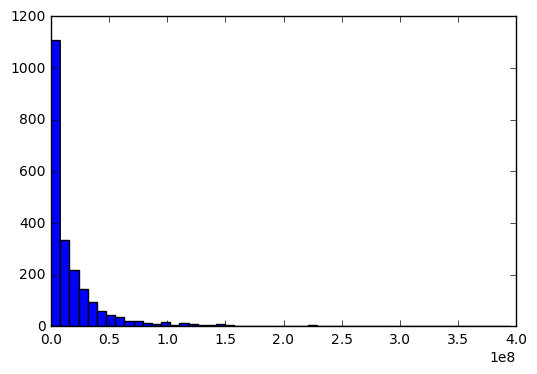

In [9]:
# Let's plot a histogram for totalvid (y)
y = df['totalvid']
plt.hist(y, bins=50)
plt.show()
# We don't see much from here

In [10]:
# Let's look at those with totalvid = 0
df[df['totalvid'] == 0]

,urlID_bom,title_bom,reldate_bom,dtg2016a,genres,runtime_bom,mpaarating,opwknd,widestrel,directors,title_tn,prodbud,totalvid,dvd8wk,blu8wk,title_rt,rt_critic,rt_user
8,jamesbond21,Casino Royale,2006-11-17 00:00:00,219958100,Action,144,PG-13,53924700.0,3443,Martin Campbell,Casino Royale (1967),12000000,0,0,0,Casino Royale,0.95,0.89
13,mi3,Mission:Impossible III,2006-05-05 00:00:00,177001200,Action,126,PG-13,63050300.0,4059,J.J. Abrams,Mission: Impossible (1996),80000000,0,0,0,Mission: Impossible III,0.70,0.69
22,openseason06,Open Season,2006-09-29 00:00:00,112390900,Animation,100,PG,31198800.0,3833,Roger Allers,Open Season (1996),0,0,0,0,Open Season,0.48,0.57
25,pinkpanther05,The Pink Panther (2006),2006-02-10 00:00:00,108589200,Comedy,92,PG,26703300.0,3477,Shawn Levy,The Pink Panther (1964),0,0,0,0,The Pink Panther,0.22,0.51
34,rv,RV,2006-04-28 00:00:00,94722200,Family Comedy,98,PG,21677500.0,3651,Barry Sonnenfeld,NaN,0,0,0,0,RV,0.23,0.45
41,dejavu06,Deja Vu,2006-11-22 00:00:00,84364800,Romantic Thriller,128,PG-13,27171300.0,3108,Tony Scott,Deja Vu (1998),0,0,0,0,Déjà Vu,0.55,0.73
43,madeasfamilyreunion,Tyler Perry's Madea's Family Reunion,2006-02-24 00:00:00,83539100,Comedy,107,PG-13,39658800.0,2194,Tyler Perry,NaN,0,0,0,0,NaN,0.00,0.00
45,fastandthefurious3,The Fast and the Furious:Tokyo Drift,2006-06-16 00:00:00,82557200,Action / Crime,90,PG-13,31660100.0,3030,Justin Lin,The Fast and the Furious (2001),38000000,0,0,0,The Fast and the Furious: Tokyo Drift,0.37,0.70
46,underworld2,Underworld:Evolution,2006-01-20 00:00:00,82299000,Action Horror,106,R,35467900.0,3207,Len Wiseman,Underworld (1997),0,0,0,0,Underworld: Evolution,0.16,0.72
47,shaggydog,The Shaggy Dog,2006-03-10 00:00:00,80720400,Family Comedy,98,PG,21539200.0,3501,Brian Robbins,The Shaggy Dog (1959),0,0,0,0,The Shaggy Dog,0.26,0.39


In [ ]:
# Make sure all values of 'title_tn' are str and striped
for i in range(len(df)):
    df.set_value(i, 'title_tn', str(df['title_tn'][i]).strip() )

In [41]:
# Make sure all values of 'title_rt' are str and striped
for i in range(len(df)):
    df.set_value(i, 'title_rt', str(df['title_rt'][i]).strip() )

In [45]:
df[ df['title_rt'] == 'nan'  ]

,urlID_bom,title_bom,reldate_bom,dtg2016a,genres,runtime_bom,mpaarating,opwknd,widestrel,directors,title_tn,prodbud,totalvid,dvd8wk,blu8wk,title_rt,rt_critic,rt_user
34,rv,RV,2006-04-28 00:00:00,94722200,Family Comedy,98,PG,21677500.0,3651,Barry Sonnenfeld,nan,0,0,0,0,RV,0.23,0.45
43,madeasfamilyreunion,Tyler Perry's Madea's Family Reunion,2006-02-24 00:00:00,83539100,Comedy,107,PG-13,39658800.0,2194,Tyler Perry,nan,0,0,0,0,nan,0.00,0.00
195,polarexpressimax06,The Polar Express (IMAX re-issue 2006),2006-11-17 00:00:00,3861400,IMAX,100,G,143500.0,37,unlisted,nan,0,0,0,0,nan,0.00,0.00
244,whydidigetmarried,Tyler Perry's Why Did I Get Married?,2007-10-12 00:00:00,69406900,Comedy,118,PG-13,26847400.0,2034,Tyler Perry,nan,0,0,0,0,nan,0.00,0.00
284,daddyslittlegirls,Tyler Perry's Daddy's Little Girls,2007-02-14 00:00:00,39436700,Romantic Comedy,95,PG-13,14094900.0,2111,Tyler Perry,nan,0,0,0,0,nan,0.00,0.00
327,nbc3d07,Tim Burton's The Nightmare Before Christmas in...,2007-10-19 00:00:00,18213900,Animation,76,PG,6701400.0,564,Rank,nan,0,0,0,0,nan,0.00,0.00
467,meetthebrowns,Tyler Perry's Meet the Browns,2008-03-21 00:00:00,50569200,Comedy,100,PG-13,24194500.0,2016,Tyler Perry,nan,0,0,0,0,nan,0.00,0.00
477,familythatpreys,Tyler Perry's The Family That Preys,2008-09-12 00:00:00,44702100,Comedy,111,PG-13,20939800.0,2070,Tyler Perry,nan,0,0,0,0,nan,0.00,0.00
579,class08,The Class,2008-12-19 00:00:00,4367700,Foreign,128,PG-13,0.0,126,unlisted,nan,0,0,0,0,The Class,0.95,0.82
627,itscomplicated,It's Complicated,2009-12-25 00:00:00,124624500,Romantic Comedy,118,R,25121200.0,2955,Nancy Meyers,nan,0,0,0,0,It's Complicated,0.57,0.59


In [47]:
# Let's look at those with totalvid = 0 and title_tn = NaN
df[ (df['totalvid'] == 0) & ( df['title_tn'] == 'nan' ) & ( df['title_rt'] != 'nan' ) ]

,urlID_bom,title_bom,reldate_bom,dtg2016a,genres,runtime_bom,mpaarating,opwknd,widestrel,directors,title_tn,prodbud,totalvid,dvd8wk,blu8wk,title_rt,rt_critic,rt_user
34,rv,RV,2006-04-28 00:00:00,94722200,Family Comedy,98,PG,21677500.0,3651,Barry Sonnenfeld,nan,0,0,0,0,RV,0.23,0.45
579,class08,The Class,2008-12-19 00:00:00,4367700,Foreign,128,PG-13,0.0,126,unlisted,nan,0,0,0,0,The Class,0.95,0.82
627,itscomplicated,It's Complicated,2009-12-25 00:00:00,124624500,Romantic Comedy,118,R,25121200.0,2955,Nancy Meyers,nan,0,0,0,0,It's Complicated,0.57,0.59
781,summerhours,Summer Hours,2009-05-15 00:00:00,1921300,Foreign,99,Unrated,57400.0,50,Olivier Assayas,nan,0,0,0,0,L'Heure d'été (Summer Hours),0.93,0.69
797,paris09,Paris,2009-09-18 00:00:00,1149800,Foreign,130,R,53900.0,34,Juliette Binoche,nan,0,0,0,0,"I Love You, Man",0.84,0.74
817,kingsspeech,The King's Speech,2010-11-26 00:00:00,148755000,Historical Drama,118,R,4484352.0,2584,Tom Hooper,nan,0,0,0,0,The King's Speech,0.95,0.92
998,wildestdream,The Wildest Dream,2010-08-06 00:00:00,993700,Documentary,94,PG,76100.0,21,Liam Neeson* (Narrator),nan,0,0,0,0,The Wildest Dream: Conquest of Everest,0.76,0.69
1155,biutiful,Biutiful,2011-01-28 00:00:00,5613900,Foreign,147,R,503200.0,191,Alejandro González Iñárritu,nan,0,0,0,0,X-Men: First Class,0.86,0.87
1168,kingsspeechpg13,The King's Speech (PG-13),2011-04-01 00:00:00,3589100,Historical Drama,118,PG-13,1216100.0,1011,unlisted,nan,0,0,0,0,King George VI: The Man Behind The King's Speech,0.00,0.80
1180,incendies,Incendies (U.S. only),2011-04-22 00:00:00,2229100,Foreign,130,R,54400.0,90,Denis Villeneuve,nan,0,0,0,0,Incendies,0.92,0.92


In [48]:
# I'm going to cheat a bit here and manually add some values based on poor scraping of T-N

#i=34 R-V
i = 34
title_tn = 'R-V'
prodbud = 55000000
totalvid = 32203241
dvd8wk = 0
blu8wk = 0
df.set_value(i, 'title_tn', title_tn)
df.set_value(i, 'prodbud', prodbud)
df.set_value(i, 'totalvid', totalvid)
df.set_value(i, 'dvd8wk', dvd8wk)
df.set_value(i, 'blu8wk', blu8wk)

#i=817 Kings-Speech-The
i = 817
title_tn = 'Kings-Speech-The'
prodbud = 15000000
totalvid = 48770996
dvd8wk = 27940927
blu8wk = 0
df.set_value(i, 'title_tn', title_tn)
df.set_value(i, 'prodbud', prodbud)
df.set_value(i, 'totalvid', totalvid)
df.set_value(i, 'dvd8wk', dvd8wk)
df.set_value(i, 'blu8wk', blu8wk)

#i=1200 Avengers-The-(2011)
i = 1200
title_tn = 'Avengers-The-(2011)'
prodbud = 225000000
totalvid = 233582320
dvd8wk = 69000701
blu8wk = 89590064
df.set_value(i, 'title_tn', title_tn)
df.set_value(i, 'prodbud', prodbud)
df.set_value(i, 'totalvid', totalvid)
df.set_value(i, 'dvd8wk', dvd8wk)
df.set_value(i, 'blu8wk', blu8wk)

#i=1455 Last-Vegas
i = 1455
title_tn = 'Last-Vegas'
prodbud = 28000000
totalvid = 14454073
dvd8wk = 0
blu8wk = 0
df.set_value(i, 'title_tn', title_tn)
df.set_value(i, 'prodbud', prodbud)
df.set_value(i, 'totalvid', totalvid)
df.set_value(i, 'dvd8wk', dvd8wk)
df.set_value(i, 'blu8wk', blu8wk)

#i=1506 Way-Way-Back-The
i = 1506
title_tn = 'Way-Way-Back-The'
prodbud = 5000000
totalvid = 5487797
dvd8wk = 22776954
blu8wk = 0
df.set_value(i, 'title_tn', title_tn)
df.set_value(i, 'prodbud', prodbud)
df.set_value(i, 'totalvid', totalvid)
df.set_value(i, 'dvd8wk', dvd8wk)
df.set_value(i, 'blu8wk', blu8wk)

#i=1643 Lets-Be-Cops
i = 1643
title_tn = 'Lets-Be-Cops'
prodbud = 17000000
totalvid = 13174913
dvd8wk = 0
blu8wk = 0
df.set_value(i, 'title_tn', title_tn)
df.set_value(i, 'prodbud', prodbud)
df.set_value(i, 'totalvid', totalvid)
df.set_value(i, 'dvd8wk', dvd8wk)
df.set_value(i, 'blu8wk', blu8wk)

#i=1651 Gods-Not-Dead
i = 1651
title_tn = 'Gods-Not-Dead'
prodbud = 1150000
totalvid = 30982951
dvd8wk = 12418447
blu8wk = 5400555
df.set_value(i, 'title_tn', title_tn)
df.set_value(i, 'prodbud', prodbud)
df.set_value(i, 'totalvid', totalvid)
df.set_value(i, 'dvd8wk', dvd8wk)
df.set_value(i, 'blu8wk', blu8wk)

#i=1898 Black-or-White
i = 1898
title_tn = 'Black-or-White'
prodbud = 9000000
totalvid = 5094673
dvd8wk = 0
blu8wk = 0
df.set_value(i, 'title_tn', title_tn)
df.set_value(i, 'prodbud', prodbud)
df.set_value(i, 'totalvid', totalvid)
df.set_value(i, 'dvd8wk', dvd8wk)
df.set_value(i, 'blu8wk', blu8wk)

#i=1900 Secret-in-Their-Eyes
i = 1900
title_tn = 'Secret-in-Their-Eyes'
prodbud = 20000000
totalvid = 3436390
dvd8wk = 0
blu8wk = 0
df.set_value(i, 'title_tn', title_tn)
df.set_value(i, 'prodbud', prodbud)
df.set_value(i, 'totalvid', totalvid)
df.set_value(i, 'dvd8wk', dvd8wk)
df.set_value(i, 'blu8wk', blu8wk)








,urlID_bom,title_bom,reldate_bom,dtg2016a,genres,runtime_bom,mpaarating,opwknd,widestrel,directors,title_tn,prodbud,totalvid,dvd8wk,blu8wk,title_rt,rt_critic,rt_user
0,piratesofthecaribbean2,Pirates of the Caribbean:Dead Man's Chest,2006-07-07 00:00:00,559035400,Period Adventure,151,PG-13,179120400.0,4133,Gore Verbinski,Pirates of the Caribbean: Dead Man's Chest (2006),225000000,323464171,289817134,0,Pirates of the Caribbean: Dead Man's Chest,0.54,0.72
1,nightatthemuseum,Night at the Museum,2006-12-22 00:00:00,320409800,Family Adventure,108,PG,40191200.0,3768,Shawn Levy,Night at the Museum (2006),110000000,153560084,129130032,0,Night at the Museum,0.43,0.67
2,cars,Cars,2006-06-09 00:00:00,322338600,Animation,116,G,79394500.0,3988,John Lasseter,Cars (2006),70000000,328452039,208489868,0,Cars,0.74,0.79
3,x3,X-Men:The Last Stand,2006-05-26 00:00:00,309501600,Action / Adventure,104,PG-13,135693600.0,3714,Brett Ratner,X-Men: Apocalypse (2016),178000000,22138521,6512555,15142326,X-Men: The Last Stand,0.58,0.62
4,davincicode,The Da Vinci Code,2006-05-19 00:00:00,287280600,Thriller,149,PG-13,101783900.0,3757,Ron Howard,The Da Vinci Code (2006),125000000,100215702,94387989,0,The Da Vinci Code,0.25,0.57
5,superman06,Superman Returns,2006-06-28 00:00:00,264229400,Action / Adventure,154,PG-13,69378400.0,4065,Bryan Singer,Superman Returns (2006),232000000,85702370,0,0,Superman Returns,0.76,0.61
6,happyfeet,Happy Feet,2006-11-17 00:00:00,259601100,Animation,108,PG,54849500.0,3804,George Miller,Happy Feet (2006),85000000,210292444,170079026,0,Happy Feet,0.75,0.70
7,iceage2,Ice Age:The Meltdown,2006-03-31 00:00:00,257955700,Animation,90,PG,89845800.0,3969,Carlos Saldanha,Ice Age: The Meltdown (2006),75000000,137957738,0,0,Ice Age 2: The Meltdown,0.57,0.71
8,jamesbond21,Casino Royale,2006-11-17 00:00:00,219958100,Action,144,PG-13,53924700.0,3443,Martin Campbell,Casino Royale (1967),12000000,0,0,0,Casino Royale,0.95,0.89
9,pursuitofhappyness,The Pursuit of Happyness,2006-12-15 00:00:00,210654000,Drama,116,PG-13,35051300.0,3169,Gabriele Muccino,The Pursuit of Happyness (2006),55000000,94171336,78064493,0,The Pursuit of Happyness,0.67,0.87


In [49]:
# Let's look at those with totalvid = 0 and title_tn = NaN
df[ (df['totalvid'] == 0) & ( df['title_tn'] == 'nan' ) & ( df['title_rt'] != 'nan' ) ]

,urlID_bom,title_bom,reldate_bom,dtg2016a,genres,runtime_bom,mpaarating,opwknd,widestrel,directors,title_tn,prodbud,totalvid,dvd8wk,blu8wk,title_rt,rt_critic,rt_user
579,class08,The Class,2008-12-19 00:00:00,4367700,Foreign,128,PG-13,0.0,126,unlisted,nan,0,0,0,0,The Class,0.95,0.82
627,itscomplicated,It's Complicated,2009-12-25 00:00:00,124624500,Romantic Comedy,118,R,25121200.0,2955,Nancy Meyers,nan,0,0,0,0,It's Complicated,0.57,0.59
781,summerhours,Summer Hours,2009-05-15 00:00:00,1921300,Foreign,99,Unrated,57400.0,50,Olivier Assayas,nan,0,0,0,0,L'Heure d'été (Summer Hours),0.93,0.69
797,paris09,Paris,2009-09-18 00:00:00,1149800,Foreign,130,R,53900.0,34,Juliette Binoche,nan,0,0,0,0,"I Love You, Man",0.84,0.74
998,wildestdream,The Wildest Dream,2010-08-06 00:00:00,993700,Documentary,94,PG,76100.0,21,Liam Neeson* (Narrator),nan,0,0,0,0,The Wildest Dream: Conquest of Everest,0.76,0.69
1155,biutiful,Biutiful,2011-01-28 00:00:00,5613900,Foreign,147,R,503200.0,191,Alejandro González Iñárritu,nan,0,0,0,0,X-Men: First Class,0.86,0.87
1168,kingsspeechpg13,The King's Speech (PG-13),2011-04-01 00:00:00,3589100,Historical Drama,118,PG-13,1216100.0,1011,unlisted,nan,0,0,0,0,King George VI: The Man Behind The King's Speech,0.00,0.80
1180,incendies,Incendies (U.S. only),2011-04-22 00:00:00,2229100,Foreign,130,R,54400.0,90,Denis Villeneuve,nan,0,0,0,0,Incendies,0.92,0.92
1270,beautyandthebeast3d,Beauty and the Beast (3D),2012-01-13 00:00:00,51997000,Animation,84,G,19388100.0,2625,Rank,nan,0,0,0,0,Beauty and the Beast (Die Schöne und das Biest),0.00,0.00
1380,monsieurlazhar,Monsieur Lazhar (U.S.-only),2012-04-13 00:00:00,2149300,Foreign,94,PG-13,119500.0,86,Philippe Falardeau,nan,0,0,0,0,Monsieur Lazhar,0.97,0.86


In [50]:
# Now let's remove all rows without any values in 'totalvid' and 'title_tn'
df2 = df[ df['totalvid'] > 0 ]

In [54]:
df2[ df2['title_tn'] == 'nan' ]
# Looks like the above cleared this as well

,urlID_bom,title_bom,reldate_bom,dtg2016a,genres,runtime_bom,mpaarating,opwknd,widestrel,directors,title_tn,prodbud,totalvid,dvd8wk,blu8wk,title_rt,rt_critic,rt_user


In [58]:
# Let's check the title_rt values
df2[ df2['title_rt'] == 'nan' ][ ['title_bom','reldate_bom','title_rt','rt_critic','rt_user'] ]
# It looks like most of these failed because I was looking at a release date that was near the end of one year, 
#  but rotten tomatoes has the movie listed under the next year (or other way around)

,title_bom,reldate_bom,title_rt,rt_critic,rt_user
322,Happily N'Ever After,2007-01-05 00:00:00,nan,0.0,0.0
341,The Astronaut Farmer,2007-02-23 00:00:00,nan,0.0,0.0
345,Pathfinder:Legend of the Ghost Warrior,2007-04-13 00:00:00,nan,0.0,0.0
430,"10,000 B.C.",2008-03-07 00:00:00,nan,0.0,0.0
526,Last Chance Harvey,2008-12-25 00:00:00,nan,0.0,0.0
565,Run Fat Boy Run,2008-03-28 00:00:00,nan,0.0,0.0
571,In the Name of the King:A Dungeon Siege Tale,2008-01-11 00:00:00,nan,0.0,0.0
931,The Girl with the Dragon Tattoo,2010-03-19 00:00:00,nan,0.0,0.0
1096,Extremely Loud & Incredibly Close,2011-12-25 00:00:00,nan,0.0,0.0
1099,The Iron Lady,2011-12-30 00:00:00,nan,0.0,0.0


In [61]:
# Let's cheat a little more and manually add rt values for some of these movies

#i=322 happily_never_after
i = 322
title_rt = 'happily_never_after'
rt_critic = 0.04
rt_user = 0.34
df2.set_value(i, 'title_rt', title_rt)
df2.set_value(i, 'rt_critic', rt_critic)
df2.set_value(i, 'rt_user', rt_user)

#i=341 astronaut_farmer
i = 341
title_rt = 'happily_never_after'
rt_critic = 0.57
rt_user = 0.49
df2.set_value(i, 'title_rt', title_rt)
df2.set_value(i, 'rt_critic', rt_critic)
df2.set_value(i, 'rt_user', rt_user)

#i=430 10000_bc
i = 430
title_rt = '10000_bc'
rt_critic = 0.08
rt_user = 0.37
df2.set_value(i, 'title_rt', title_rt)
df2.set_value(i, 'rt_critic', rt_critic)
df2.set_value(i, 'rt_user', rt_user)

#i=526 last_chance_harvey
i = 526
title_rt = 'last_chance_harvey'
rt_critic = 0.70
rt_user = 0.53
df2.set_value(i, 'title_rt', title_rt)
df2.set_value(i, 'rt_critic', rt_critic)
df2.set_value(i, 'rt_user', rt_user)

#i=565 run_fat_boy_run
i = 565
title_rt = 'run_fat_boy_run'
rt_critic = 0.48
rt_user = 0.64
df2.set_value(i, 'title_rt', title_rt)
df2.set_value(i, 'rt_critic', rt_critic)
df2.set_value(i, 'rt_user', rt_user)

#i=571 in-the-name-of-the-king-a-dungeon-siege-tale
i = 571
title_rt = 'in-the-name-of-the-king-a-dungeon-siege-tale'
rt_critic = 0.04
rt_user = 0.22
df2.set_value(i, 'title_rt', title_rt)
df2.set_value(i, 'rt_critic', rt_critic)
df2.set_value(i, 'rt_user', rt_user)

#i=931 the_girl_with_the_dragon_tattoo_2009
i = 931
title_rt = 'the_girl_with_the_dragon_tattoo_2009'
rt_critic = 0.86
rt_user = 0.86
df2.set_value(i, 'title_rt', title_rt)
df2.set_value(i, 'rt_critic', rt_critic)
df2.set_value(i, 'rt_user', rt_user)

#i=1096 extremely_loud_and_incredibly_close
i = 1096
title_rt = 'extremely_loud_and_incredibly_close'
rt_critic = 0.46
rt_user = 0.61
df2.set_value(i, 'title_rt', title_rt)
df2.set_value(i, 'rt_critic', rt_critic)
df2.set_value(i, 'rt_user', rt_user)

#i=1099 the_iron_lady
i = 1099
title_rt = 'the_iron_lady'
rt_critic = 0.51
rt_user = 0.51
df2.set_value(i, 'title_rt', title_rt)
df2.set_value(i, 'rt_critic', rt_critic)
df2.set_value(i, 'rt_user', rt_user)

#i=1231 zero_dark_thirty
i = 1231
title_rt = 'zero_dark_thirty'
rt_critic = 0.92
rt_user = 0.80
df2.set_value(i, 'title_rt', title_rt)
df2.set_value(i, 'rt_critic', rt_critic)
df2.set_value(i, 'rt_user', rt_user)

#i=1600 american_sniper
i = 1600
title_rt = 'american_sniper'
rt_critic = 0.72
rt_user = 0.84
df2.set_value(i, 'title_rt', title_rt)
df2.set_value(i, 'rt_critic', rt_critic)
df2.set_value(i, 'rt_user', rt_user)

#i=1736 inherent_vice
i = 1736
title_rt = 'inherent_vice'
rt_critic = 0.74
rt_user = 0.52
df2.set_value(i, 'title_rt', title_rt)
df2.set_value(i, 'rt_critic', rt_critic)
df2.set_value(i, 'rt_user', rt_user)

#i=1742 a_most_violent_year
i = 1742
title_rt = 'a_most_violent_year'
rt_critic = 0.89
rt_user = 0.69
df2.set_value(i, 'title_rt', title_rt)
df2.set_value(i, 'rt_critic', rt_critic)
df2.set_value(i, 'rt_user', rt_user)

,urlID_bom,title_bom,reldate_bom,dtg2016a,genres,runtime_bom,mpaarating,opwknd,widestrel,directors,title_tn,prodbud,totalvid,dvd8wk,blu8wk,title_rt,rt_critic,rt_user
0,piratesofthecaribbean2,Pirates of the Caribbean:Dead Man's Chest,2006-07-07 00:00:00,559035400,Period Adventure,151,PG-13,179120400.0,4133,Gore Verbinski,Pirates of the Caribbean: Dead Man's Chest (2006),225000000,323464171,289817134,0,Pirates of the Caribbean: Dead Man's Chest,0.54,0.72
1,nightatthemuseum,Night at the Museum,2006-12-22 00:00:00,320409800,Family Adventure,108,PG,40191200.0,3768,Shawn Levy,Night at the Museum (2006),110000000,153560084,129130032,0,Night at the Museum,0.43,0.67
2,cars,Cars,2006-06-09 00:00:00,322338600,Animation,116,G,79394500.0,3988,John Lasseter,Cars (2006),70000000,328452039,208489868,0,Cars,0.74,0.79
3,x3,X-Men:The Last Stand,2006-05-26 00:00:00,309501600,Action / Adventure,104,PG-13,135693600.0,3714,Brett Ratner,X-Men: Apocalypse (2016),178000000,22138521,6512555,15142326,X-Men: The Last Stand,0.58,0.62
4,davincicode,The Da Vinci Code,2006-05-19 00:00:00,287280600,Thriller,149,PG-13,101783900.0,3757,Ron Howard,The Da Vinci Code (2006),125000000,100215702,94387989,0,The Da Vinci Code,0.25,0.57
5,superman06,Superman Returns,2006-06-28 00:00:00,264229400,Action / Adventure,154,PG-13,69378400.0,4065,Bryan Singer,Superman Returns (2006),232000000,85702370,0,0,Superman Returns,0.76,0.61
6,happyfeet,Happy Feet,2006-11-17 00:00:00,259601100,Animation,108,PG,54849500.0,3804,George Miller,Happy Feet (2006),85000000,210292444,170079026,0,Happy Feet,0.75,0.70
7,iceage2,Ice Age:The Meltdown,2006-03-31 00:00:00,257955700,Animation,90,PG,89845800.0,3969,Carlos Saldanha,Ice Age: The Meltdown (2006),75000000,137957738,0,0,Ice Age 2: The Meltdown,0.57,0.71
9,pursuitofhappyness,The Pursuit of Happyness,2006-12-15 00:00:00,210654000,Drama,116,PG-13,35051300.0,3169,Gabriele Muccino,The Pursuit of Happyness (2006),55000000,94171336,78064493,0,The Pursuit of Happyness,0.67,0.87
10,overthehedge,Over the Hedge,2006-05-19 00:00:00,204720200,Animation,87,PG,50786700.0,4093,Tim Johnson,Over the Hedge (2006),80000000,130425424,107905342,0,Over the Hedge,0.75,0.71


In [62]:
# Let's check the title_rt values again
df2[ df2['title_rt'] == 'nan' ][ ['title_bom','reldate_bom','title_rt','rt_critic','rt_user'] ]

,title_bom,reldate_bom,title_rt,rt_critic,rt_user
345,Pathfinder:Legend of the Ghost Warrior,2007-04-13 00:00:00,nan,0.0,0.0
1245,Tyler Perry's Madea's Witness Protection,2012-06-29 00:00:00,nan,0.0,0.0
1714,Tyler Perry's The Single Moms Club,2014-03-14 00:00:00,nan,0.0,0.0
1773,The Admiral:Roaring Currents,2014-08-08 00:00:00,nan,0.0,0.0
1822,The Divergent Series:Insurgent,2015-03-20 00:00:00,nan,0.0,0.0


In [64]:
# Now let's remove all rows with 'nan's in 'title_rt'
df3 = df2[ df2['title_rt'] != 'nan' ]
df3[ df3['title_rt'] == 'nan' ][ ['title_bom','reldate_bom','title_rt','rt_critic','rt_user'] ]

,title_bom,reldate_bom,title_rt,rt_critic,rt_user


In [66]:
len(df3)
# 1596 from 2200

1596

In [71]:
# Making sure there aren't and nan values here
df3['title_tn'].value_counts()
df3['title_rt'].value_counts()
df3['title_bom'].value_counts()

The Hunger Games                                     1
The Next Three Days                                  1
Welcome Home Roscoe Jenkins                          1
Dragon Wars                                          1
Tyler Perry's Good Deeds                             1
Percy Jackson & The Olympians:The Lightning Thief    1
The Great Debaters                                   1
12 Rounds                                            1
Strange Magic                                        1
The Blind Side                                       1
Bride Wars                                           1
Shorts                                               1
Freedom Writers                                      1
The Box                                              1
Straw Dogs (2011)                                    1
Paranormal Activity:The Marked Ones                  1
Fruitvale Station                                    1
Miles Ahead                                          1
Jack Ryan:

In [73]:
df3.columns

Index(['urlID_bom', 'title_bom', 'reldate_bom', 'dtg2016a', 'genres',
       'runtime_bom', 'mpaarating', 'opwknd', 'widestrel', 'directors',
       'title_tn', 'prodbud', 'totalvid', 'dvd8wk', 'blu8wk', 'title_rt',
       'rt_critic', 'rt_user'],
      dtype='object')

In [75]:
# So let's get rid of some more unnecessary columns
df3.drop(['urlID_bom','title_tn','title_rt'],axis=1,inplace=True)
df3.head()



/Users/ggarbagnati/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,title_bom,reldate_bom,dtg2016a,genres,runtime_bom,mpaarating,opwknd,widestrel,directors,prodbud,totalvid,dvd8wk,blu8wk,rt_critic,rt_user
0,Pirates of the Caribbean:Dead Man's Chest,2006-07-07 00:00:00,559035400,Period Adventure,151,PG-13,179120400.0,4133,Gore Verbinski,225000000,323464171,289817134,0,0.54,0.72
1,Night at the Museum,2006-12-22 00:00:00,320409800,Family Adventure,108,PG,40191200.0,3768,Shawn Levy,110000000,153560084,129130032,0,0.43,0.67
2,Cars,2006-06-09 00:00:00,322338600,Animation,116,G,79394500.0,3988,John Lasseter,70000000,328452039,208489868,0,0.74,0.79
3,X-Men:The Last Stand,2006-05-26 00:00:00,309501600,Action / Adventure,104,PG-13,135693600.0,3714,Brett Ratner,178000000,22138521,6512555,15142326,0.58,0.62
4,The Da Vinci Code,2006-05-19 00:00:00,287280600,Thriller,149,PG-13,101783900.0,3757,Ron Howard,125000000,100215702,94387989,0,0.25,0.57


In [78]:
# The above complained, so let's see if this fixes it
df3 = df3.copy()
df3.head()

,title_bom,reldate_bom,dtg2016a,genres,runtime_bom,mpaarating,opwknd,widestrel,directors,prodbud,totalvid,dvd8wk,blu8wk,rt_critic,rt_user
0,Pirates of the Caribbean:Dead Man's Chest,2006-07-07 00:00:00,559035400,Period Adventure,151,PG-13,179120400.0,4133,Gore Verbinski,225000000,323464171,289817134,0,0.54,0.72
1,Night at the Museum,2006-12-22 00:00:00,320409800,Family Adventure,108,PG,40191200.0,3768,Shawn Levy,110000000,153560084,129130032,0,0.43,0.67
2,Cars,2006-06-09 00:00:00,322338600,Animation,116,G,79394500.0,3988,John Lasseter,70000000,328452039,208489868,0,0.74,0.79
3,X-Men:The Last Stand,2006-05-26 00:00:00,309501600,Action / Adventure,104,PG-13,135693600.0,3714,Brett Ratner,178000000,22138521,6512555,15142326,0.58,0.62
4,The Da Vinci Code,2006-05-19 00:00:00,287280600,Thriller,149,PG-13,101783900.0,3757,Ron Howard,125000000,100215702,94387989,0,0.25,0.57


In [83]:
# Just a brief look at the numbers made me observe that usually about ~80-90% of video sales occurs in the first
#  8 weeks (which is why I collected that data). Let's look into this:

# First let's get the movies that have 8 week values
df4 = df3[ (df3['dvd8wk'] != 0) | (df3['blu8wk'] != 0) ].copy()

In [85]:
df4[ ['title_bom', 'totalvid', 'dvd8wk', 'blu8wk'] ].sample(20)

,title_bom,totalvid,dvd8wk,blu8wk
234,Disturbia,34861608,25515341,0
1069,Hall Pass,12531437,5525472,0
831,The Social Network,35974748,19451666,8773886
1824,Kingsman:The Secret Service,29059121,9654615,8990589
1266,Red Tails,22766800,12390222,0
261,No Reservations,27243419,20231049,0
1864,Everest (2015),7755378,2733720,2826276
1401,Iron Man 3,82085957,20089600,48059481
1881,Chappie,11110383,4910553,3745868
1610,Dawn of the Planet of the Apes,41198230,20695433,17275710


In [86]:
# Sum up the totals of the two 8wk sales
df4['tot8wk'] = df4['dvd8wk'] + df4['blu8wk']
df4[ ['title_bom', 'totalvid', 'tot8wk'] ].sample(20)

,title_bom,totalvid,tot8wk
1040,War Horse,43683876,23626167
1823,The Peanuts Movie,30587844,25166990
1227,Magic Mike,46307218,24871633
625,G-Force,71164182,39432976
208,Alvin and the Chipmunks,139739406,108977785
2006,Zootopia,89652770,80466499
2065,The Huntsman:Winter's War,14661231,13573291
83,The Wild,43205003,32777207
1037,Immortals,36636748,30899016
1201,The Dark Knight Rises,151931944,133512505


In [90]:
# Get a percent of the total 8 wk sales out of the total video sales
df4['per8wk'] = df4['tot8wk'] / df4['totalvid']
df4[ ['title_bom', 'per8wk', 'dvd8wk', 'blu8wk'] ].sample(20)

,title_bom,per8wk,dvd8wk,blu8wk
1615,Interstellar,0.631238,8583958,19279406
1481,Walking with Dinosaurs,0.506941,6103867,0
1029,Cowboys & Aliens,0.820497,21224986,20938341
1002,The Twilight Saga:Breaking Dawn Part 1,0.614667,88191016,0
432,High School Musical 3:Senior Year,0.864621,53752603,0
472,Lakeview Terrace,0.791731,17637518,0
1223,Prometheus,0.858302,15239357,21154166
62,Apocalypto,0.816924,35487959,0
1805,Minions,0.912949,41944841,59511341
1844,War Room,0.586648,22851927,0


In [97]:
len(df4)

474

In [91]:
df4['per8wk'].mean()

0.6758354446062546

In [92]:
df4['per8wk'].std()

0.2274224780719998

In [95]:
df4['per8wk'].max()

4.1504731315680958

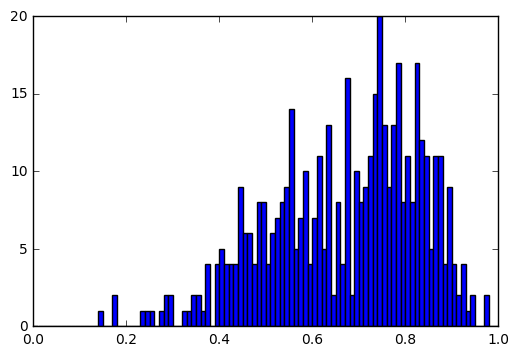

In [96]:
plt.hist(df4['per8wk'],bins=100,range=(0,1))
plt.show()
# I was hoping for a tighter bell curve... maybe if I look at movies with both a 'dvd8wk' and 'blu8wk'?

In [98]:
# Make a copy of those with both values
df5 = df4[ (df4['dvd8wk'] != 0) & (df4['blu8wk'] != 0) ].copy()

In [115]:
df5[ ['title_bom', 'reldate_bom', 'totalvid', 'dvd8wk', 'blu8wk', 'per8wk'] ].sample(20)

,title_bom,reldate_bom,totalvid,dvd8wk,blu8wk,per8wk
1615,Interstellar,2014-11-05 00:00:00,44140840,8583958,19279406,0.631238
804,Harry Potter and the Deathly Hallows Part 1,2010-11-19 00:00:00,154345692,67703429,43514618,0.720578
1664,Jack Ryan:Shadow Recruit,2014-01-17 00:00:00,15591579,6027368,6200104,0.784236
1427,The Wolf of Wall Street,2013-12-25 00:00:00,33956352,9791369,12417463,0.654041
1208,Ted,2012-06-29 00:00:00,131513592,72569559,45897323,0.900796
614,2012,2009-11-13 00:00:00,75176886,44334135,19017182,0.842697
831,The Social Network,2010-10-01 00:00:00,35974748,19451666,8773886,0.784593
835,The Town,2010-09-17 00:00:00,54841911,24051795,16951321,0.747660
606,Star Trek,2009-05-08 00:00:00,198968255,91150755,55473875,0.736925
1638,Fury (2014),2014-10-17 00:00:00,29254573,10668378,11198349,0.747464


In [105]:
print(df5['per8wk'].mean())
print(df5['per8wk'].std())
print(df5['per8wk'].max())
print(len(df5))

0.7531676329655868
0.10586199033539273
0.978153915521
177


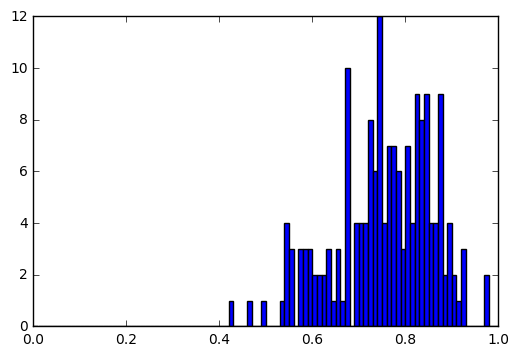

In [106]:
plt.hist(df5['per8wk'],bins=100,range=(0,1))
plt.show()
# This is a little tighter...

In [118]:
import os
os.system('afplay /System/Library/Sounds/Sosumi.aiff')
os.system('afplay /System/Library/Sounds/Sosumi.aiff')
os.system('afplay /System/Library/Sounds/Sosumi.aiff')
# Sound!

0

In [120]:
# Let's save df5 in case we need it

df5.to_csv('08-cleanedOnly8wk.csv')

0

In [119]:
# So let's go back to df3, make another column for vidsales * .75, remove dvd8wk/blu8wk, and start modeling?
df3.columns

Index(['title_bom', 'reldate_bom', 'dtg2016a', 'genres', 'runtime_bom',
       'mpaarating', 'opwknd', 'widestrel', 'directors', 'prodbud', 'totalvid',
       'dvd8wk', 'blu8wk', 'rt_critic', 'rt_user'],
      dtype='object')

In [121]:
df3.drop(['title_bom','dvd8wk','blu8wk'],axis=1,inplace=True)
df3.head()

,reldate_bom,dtg2016a,genres,runtime_bom,mpaarating,opwknd,widestrel,directors,prodbud,totalvid,rt_critic,rt_user
0,2006-07-07 00:00:00,559035400,Period Adventure,151,PG-13,179120400.0,4133,Gore Verbinski,225000000,323464171,0.54,0.72
1,2006-12-22 00:00:00,320409800,Family Adventure,108,PG,40191200.0,3768,Shawn Levy,110000000,153560084,0.43,0.67
2,2006-06-09 00:00:00,322338600,Animation,116,G,79394500.0,3988,John Lasseter,70000000,328452039,0.74,0.79
3,2006-05-26 00:00:00,309501600,Action / Adventure,104,PG-13,135693600.0,3714,Brett Ratner,178000000,22138521,0.58,0.62
4,2006-05-19 00:00:00,287280600,Thriller,149,PG-13,101783900.0,3757,Ron Howard,125000000,100215702,0.25,0.57


In [122]:
len(df3)

1596

In [123]:
# Now we'll save the data

df3.to_csv('09-cleaneddata.csv')

0

In [124]:
# Let's transform the y by 0.75
df3['totalvid'] = df3['totalvid'] * 0.75

In [125]:
# Now we'll save the transformed

df3.to_csv('10-cleanedtformdata.csv')